In [19]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

from config import creds

database_path = f"postgresql://{creds}@localhost:5432/pewlett_hackard"

In [20]:
# Create Engine
engine = create_engine(database_path)
conn = engine.connect()

In [21]:
titles = pd.read_sql("SELECT * FROM titles", conn)
titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [22]:
salaries = pd.read_sql("SELECT * FROM salaries", conn)
salaries.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


In [23]:
merged=pd.merge(titles, salaries, on="emp_no")
merged.head()

,emp_no,title,from_date_x,to_date_x,salary,from_date_y,to_date_y
0,10001,Senior Engineer,1986-06-26,9999-01-01,60117,1986-06-26,1987-06-26
1,10002,Staff,1996-08-03,9999-01-01,65828,1996-08-03,1997-08-03
2,10003,Senior Engineer,1995-12-03,9999-01-01,40006,1995-12-03,1996-12-02
3,10004,Engineer,1986-12-01,1995-12-01,40054,1986-12-01,1987-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01,40054,1986-12-01,1987-12-01


In [24]:
grouped=merged.groupby(['title'])


In [25]:
salary_group=grouped['salary'].mean()
salary_group

title
Assistant Engineer    48493.204786
Engineer              48539.781423
Manager               51531.041667
Senior Engineer       48506.751806
Senior Staff          58503.286614
Staff                 58465.271904
Technique Leader      48580.505772
Name: salary, dtype: float64

Text(0, 0.5, 'Avg Salary')

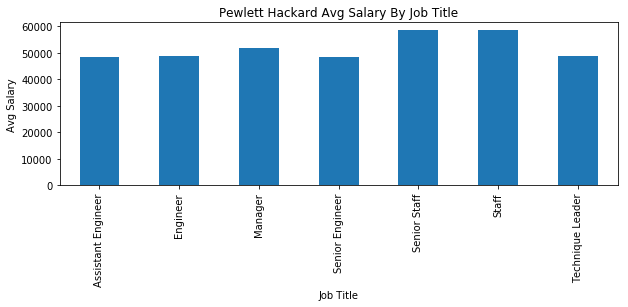

In [29]:
salary_group.plot(kind="bar", figsize=(10,3))
plt.title("Pewlett Hackard Avg Salary By Job Title")
plt.xlabel("Job Title")
plt.ylabel("Avg Salary")



Looking at the results in our chart, it looks like we have spurious data. All engineers have similar salaries, as do staff and senior staff. One would expect managers to have higher salaries than staff which is not the case. Returning this result to my boss, he advises me to check my employee ID. Upon querying the DB, I see that I am in there with the name April Foolsday. Quite a funny dad joke from my new boss.